<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

import spacy
nlp = spacy.load("en_core_web_lg")

C:\Users\soobt\Anaconda3\envs\jupyterlab\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
df = pd.read_csv('./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [3]:
df['reviews.text'].head()

0    I order 3 of them and one of the item is bad q...
1    Bulk is always the less expensive way to go fo...
2    Well they are not Duracell but for the price i...
3    Seem to work as well as name brand batteries a...
4    These batteries are very long lasting the pric...
Name: reviews.text, dtype: object

In [4]:
def tokenize(text):
    return [token.lemma_ for token in nlp(text) if (token.is_stop != True) and (token.is_punct != True)]

In [106]:
df['tokens'] = df['reviews.text'].str.lower().apply(tokenize)

In [107]:
tokens = df['tokens'].copy()

In [6]:
df['tokens'].head()

0    [order, 3, item, bad, quality, miss, backup, s...
1                [bulk, expensive, way, product, like]
2                             [duracell, price, happy]
3                  [work, brand, battery, well, price]
4                  [battery, long, last, price, great]
Name: tokens, dtype: object

In [189]:
df['tokens'] = tokens

In [180]:
stop_words = set(['amazon'
                  ])
# Remove custom stop words
lis = []
for l in df['tokens']:
    lis.append(list(set(l) - stop_words))

df['tokens'] = lis

In [181]:
id2word = corpora.Dictionary(df['tokens'])

In [190]:
len(id2word.keys())

1948

In [191]:
id2word.token2id['kid']

160

In [192]:
id2word.filter_extremes(no_below=10, no_above=0.98)

In [193]:
len(id2word.keys())

1948

In [194]:
corpus = [id2word.doc2bow(text) for text in df['tokens']]

In [204]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   num_topics = 3,
                   passes=10,
                   workers=4
                  )

In [196]:
CoherenceModel(model=lda, dictionary=id2word, corpus=corpus, coherence='u_mass').get_coherence()

-2.493168815629271

In [100]:
lda.print_topics()

[(0,
  '0.062*"christmas" + 0.047*"purchase" + 0.025*"get" + 0.019*"mother" + 0.018*"present" + 0.018*"affordable" + 0.018*"slow" + 0.016*"wife" + 0.016*"mom" + 0.015*"grandson"'),
 (1,
  '0.080*"game" + 0.059*"play" + 0.048*"book" + 0.044*"read" + 0.040*"watch" + 0.030*"kid" + 0.030*"video" + 0.028*"movie" + 0.027*"enjoy" + 0.025*"son"'),
 (2,
  '0.034*"8" + 0.030*"grandson" + 0.026*"durable" + 0.026*"7" + 0.023*"fast" + 0.019*"big" + 0.019*"kid" + 0.019*"hd" + 0.018*"card" + 0.017*"purchase"'),
 (3,
  '0.047*"screen" + 0.026*"read" + 0.022*"book" + 0.018*"size" + 0.015*"internet" + 0.014*"new" + 0.012*"nice" + 0.012*"picture" + 0.011*"web" + 0.011*"clear"'),
 (4,
  '0.026*"duracell" + 0.020*"remote" + 0.020*"box" + 0.019*"toy" + 0.018*"aa" + 0.016*"find" + 0.016*"come" + 0.016*"pack" + 0.014*"energizer" + 0.014*"package"'),
 (5,
  '0.105*"value" + 0.055*"item" + 0.051*"nice" + 0.051*"user" + 0.046*"friendly" + 0.031*"money" + 0.021*"time" + 0.021*"exactly" + 0.021*"low" + 0.016*"look

In [101]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [102]:
words[0:2]

[['christmas',
  'purchase',
  'get',
  'mother',
  'present',
  'affordable',
  'slow',
  'wife',
  'mom',
  'grandson'],
 ['game',
  'play',
  'book',
  'read',
  'watch',
  'kid',
  'video',
  'movie',
  'enjoy',
  'son']]

In [76]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [ ]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

In [19]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model, dictionary=dictionary, corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [199]:
# Can take a long time to run.
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        start=2, 
                                                        limit=6, 
                                                        step=1,
                                                        passes=40)

In [200]:
coherence_values

[{'pass': 0, 'num_topics': 2, 'coherence_score': -2.3076054770616325},
 {'pass': 0, 'num_topics': 3, 'coherence_score': -2.329845425710095},
 {'pass': 0, 'num_topics': 4, 'coherence_score': -2.316670748642834},
 {'pass': 0, 'num_topics': 5, 'coherence_score': -2.3851236983162627},
 {'pass': 1, 'num_topics': 2, 'coherence_score': -2.3178397029744215},
 {'pass': 1, 'num_topics': 3, 'coherence_score': -2.3408008098901814},
 {'pass': 1, 'num_topics': 4, 'coherence_score': -2.3135546555702664},
 {'pass': 1, 'num_topics': 5, 'coherence_score': -2.3630761593825427},
 {'pass': 2, 'num_topics': 2, 'coherence_score': -2.2608760640122294},
 {'pass': 2, 'num_topics': 3, 'coherence_score': -2.2427912865294175},
 {'pass': 2, 'num_topics': 4, 'coherence_score': -2.2675194789254025},
 {'pass': 2, 'num_topics': 5, 'coherence_score': -2.3676343774489377},
 {'pass': 3, 'num_topics': 2, 'coherence_score': -2.3487473470568636},
 {'pass': 3, 'num_topics': 3, 'coherence_score': -2.2704985301586635},
 {'pass'

In [30]:
coherence_values

[{'pass': 0, 'num_topics': 2, 'coherence_score': -2.2324852272092555},
 {'pass': 0, 'num_topics': 8, 'coherence_score': -2.3146999609603167},
 {'pass': 0, 'num_topics': 14, 'coherence_score': -2.4930840878351566},
 {'pass': 0, 'num_topics': 20, 'coherence_score': -2.473882070860653},
 {'pass': 0, 'num_topics': 26, 'coherence_score': -2.6306911152132386},
 {'pass': 0, 'num_topics': 32, 'coherence_score': -2.637336775194375},
 {'pass': 0, 'num_topics': 38, 'coherence_score': -2.6623330713831197},
 {'pass': 1, 'num_topics': 2, 'coherence_score': -2.2461544878862574},
 {'pass': 1, 'num_topics': 8, 'coherence_score': -2.348254431373692},
 {'pass': 1, 'num_topics': 14, 'coherence_score': -2.5709279943013543},
 {'pass': 1, 'num_topics': 20, 'coherence_score': -2.5202310730137905},
 {'pass': 1, 'num_topics': 26, 'coherence_score': -2.6317282029531315},
 {'pass': 1, 'num_topics': 32, 'coherence_score': -2.644844201457623},
 {'pass': 1, 'num_topics': 38, 'coherence_score': -2.642170695798065},
 

In [202]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

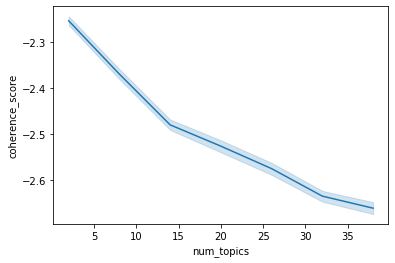

In [34]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

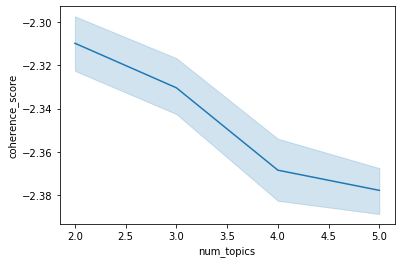

In [203]:
ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

I guess three topics?

In [ ]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

In [211]:
import re

In [210]:
lda.show_topics()

[(0,
  '0.093*"battery" + 0.057*"great" + 0.057*"price" + 0.053*"good" + 0.035*"work" + 0.025*"long" + 0.023*"buy" + 0.021*"brand" + 0.013*"quality" + 0.013*"product"'),
 (1,
  '0.016*"like" + 0.015*"kindle" + 0.014*"device" + 0.013*"product" + 0.013*"charge" + 0.013*"good" + 0.011*"screen" + 0.010*"buy" + 0.009*"light" + 0.009*"work"'),
 (2,
  '0.053*"tablet" + 0.040*"love" + 0.028*"great" + 0.025*"use" + 0.021*"buy" + 0.021*"easy" + 0.020*"kid" + 0.017*"old" + 0.016*"app" + 0.016*"fire"')]

In [264]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [215]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [254]:
coefs = [list(map(float, re.findall(r'\d\.\d\d\d',t[1]))) for t in lda.print_topics()]

In [259]:
topicDf = pd.DataFrame()

In [260]:
topicDf['topics'] = [1]*10 + [2]*10 + [3]*10

In [266]:
topicDf['coefs'] = flatten(coefs)

In [267]:
topicDf['words'] = flatten(words)

In [273]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

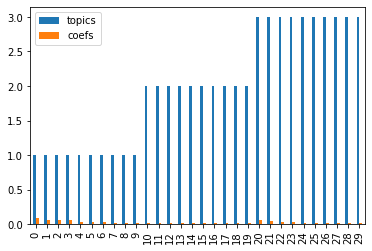

In [271]:
topicDf.plot(kind='bar', )

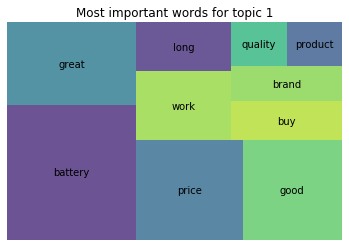

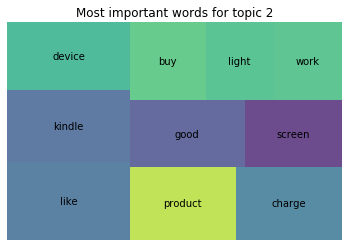

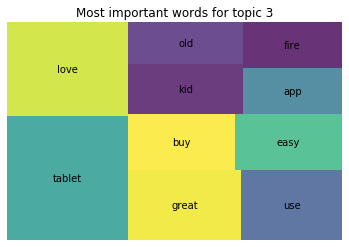

In [275]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


topic_1 = topicDf[topicDf['topics'] == 1]['coefs']
topic_1_labels = topicDf[topicDf['topics'] == 1]['words']
topic_2 = topicDf[topicDf['topics'] == 2]['coefs']
topic_2_labels = topicDf[topicDf['topics'] == 2]['words']
topic_3 = topicDf[topicDf['topics'] == 3]['coefs']
topic_3_labels = topicDf[topicDf['topics'] == 3]['words']

squarify.plot(sizes=topic_1, label=topic_1_labels, alpha=.8 )
plt.axis('off')
plt.title('Most important words for topic 1')
plt.show()

squarify.plot(sizes=topic_2, label=topic_2_labels, alpha=.8 )
plt.axis('off')
plt.title('Most important words for topic 2')
plt.show()

squarify.plot(sizes=topic_3, label=topic_3_labels, alpha=.8 )
plt.axis('off')
plt.title('Most important words for topic 3')
plt.show()

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling